In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

In [10]:
from Bio import SeqIO
import torch

In [11]:
pro_class_list=[]
proteins =[]



# File path to your FASTA file
path_to_file = 'motif.txt'   # <--- substitute by your local path

# Open file with "with" statement to avoid problems with access 
# to original file (in case computer hangs
# or there will be any other problem)
with open(path_to_file, mode='r') as handle:

    # Use Biopython's parse function to process individual
    # FASTA records (thus reducing memory footprint)
    for record in SeqIO.parse(handle, 'fasta'):

        # Extract individual parts of the FASTA record
        identifier = record.id
        pro_class = record.description.split('|')[5]
        
        #pro_class = description
        sequence = record.seq
        
        pro_class_list.append(pro_class)
        proteins.append(sequence)
        
    
        # Example: adapt to extract features you are interested in
        #print('----------------------------------------------------------')
        #print('Processing the record {}:'.format(identifier))
        #print('Its description is: \n{}'.format(description))
        #print(pro_class)
        #amount_of_nucleotides = len(sequence)
        #print('Its sequence contains {} nucleotides.'.format(amount_of_nucleotides))

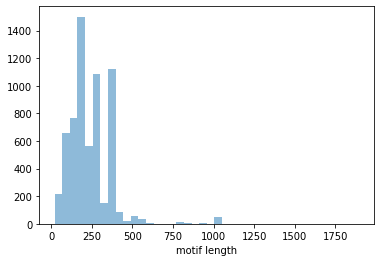

In [92]:
protein_lens= [len(x) for x in proteins]

plt.hist(protein_lens,40, alpha=0.5)
plt.xlabel("motif length")
#plt.title('Motif Length Distribution ')
#plt.vlines(x=700,colors='r',ymin=0,ymax=3000,alpha=0.5,linestyle= '--')

plt.savefig('motif_length_distribution')
plt.show()

In [13]:
main_proteins=[]
main_pro_class_list =[]

for protein in proteins:
    if len(protein) <= 400 and len(protein) >=150:
        main_proteins.append(protein)
        main_pro_class_list.append(pro_class_list[proteins.index(protein)])

In [89]:
sixmain_class = ['Aminoglycosides','betalactams','Glycopeptides','Phenicol','Tetracyclines','Trimethoprim']
sixmain_proteins=[]
sixmain_pro_class_list=[]
category_distribution_list={'Aminoglycosides':0 ,'betalactams':0,'Glycopeptides': 0,'Phenicol':0 ,'Tetracyclines':0 ,'Trimethoprim':0}
other = 0

for i in range(len(main_pro_class_list)):
    label = main_pro_class_list[i]
    if label.lower()[:3] == 'aac' or label.lower()[:3] == 'ant' or label.lower()[:3] == 'aad' or label.lower()[:3] == 'aph' or label.lower()[:3] == 'rmt':
        #'Aminoglycosides
        sixmain_proteins.append(main_proteins[i])
        sixmain_pro_class_list.append(main_pro_class_list[i])
        category_distribution_list['Aminoglycosides'] += 1
    elif label.lower()[:3] == 'bla' or label.lower()[:3] ==  'pbp' or label.lower()[:3] ==  'mec':
        #'betalactams'
        sixmain_proteins.append(main_proteins[i])
        sixmain_pro_class_list.append(main_pro_class_list[i])
        category_distribution_list['betalactams'] += 1
    elif label.lower()[:3] ==  'van':
        #'Glycopeptides'
        sixmain_proteins.append(main_proteins[i])
        sixmain_pro_class_list.append(main_pro_class_list[i])
        category_distribution_list['Glycopeptides'] += 1
    elif label.lower()[:3] ==  'cat' or label.lower()[:3] ==  'cml' or label.lower()[:3] ==  'emr' or label.lower()[:3] ==  'est' or label.lower()[:3] == 'flo' or label.lower()[:3] ==  'cfr':
        #'Phenicol'
        sixmain_proteins.append(main_proteins[i])
        sixmain_pro_class_list.append(main_pro_class_list[i])
        category_distribution_list['Phenicol'] += 1
    elif label.lower()[:3] ==  'tet' or label.lower()[:3] ==  'tcm':
        sixmain_proteins.append(main_proteins[i])
        sixmain_pro_class_list.append(main_pro_class_list[i])
        category_distribution_list['Tetracyclines'] += 1
    elif label.lower()[:3] == 'dfr':
        #'Trimethoprim'
        sixmain_proteins.append(main_proteins[i])
        sixmain_pro_class_list.append(main_pro_class_list[i])
        category_distribution_list['Trimethoprim'] += 1
    else:
        other += 1
    
    

In [90]:
category_distribution_list

{'Aminoglycosides': 151,
 'betalactams': 3132,
 'Glycopeptides': 130,
 'Phenicol': 88,
 'Tetracyclines': 162,
 'Trimethoprim': 102}

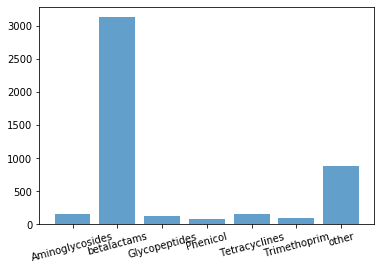

In [91]:
y_category=[]
for aclass in sixmain_class:
    y_category.append(category_distribution_list[aclass])

x_category = sixmain_class
x_category.append('other')
y_category.append(other)

#plt.figure(figsize= (9,4))
plt.bar(x_category,y_category,alpha=0.7 )
plt.xticks(rotation= 15)
#plt.title('Class distribution of training data')
plt.savefig('Class distribution of training data.png')

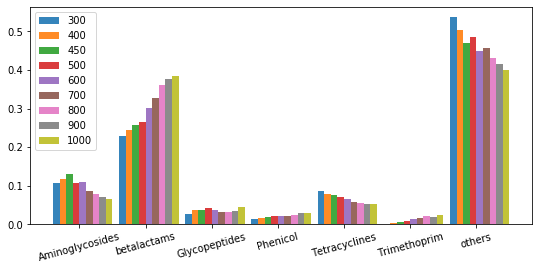

In [87]:
x_labels =['Aminoglycosides', 'betalactams', 'Glycopeptides', 'Phenicol' , 'Tetracyclines', 'Trimethoprim', 'others']
y_300 = [0.106666667, 0.23, 0.026666667, 0.013333333, 0.086666667, 0, 0.536666667]
y_400 = [0.1175, 0.245, 0.0375, 0.0175, 0.0775, 0.0025, 0.5025]
y_450 = [0.131111111, 0.257777778, 0.037777778, 0.02, 0.075555556, 0.006666667, 0.471111111]
y_500 = [0.106, 0.264, 0.042, 0.022, 0.072, 0.008, 0.486]
y_600 = [0.11, 0.301666667, 0.038333333, 0.021666667, 0.065, 0.013333333, 0.45]
y_700 = [0.085714286, 0.328571429, 0.032857143, 0.021428571, 0.057142857, 0.017142857, 0.457142857]
y_800=[0.0775, 0.36, 0.03125, 0.02375, 0.05625, 0.02125, 0.43 ]
y_900 =[0.07, 0.375555556, 0.035555556, 0.03, 0.053333333, 0.02, 0.415555556]
y_1000 = [0.065, 0.384, 0.045, 0.029, 0.053, 0.023, 0.401]


barWidth = 0.1

r300 = np.arange(len(y_300))
r400 = [x + barWidth for x in r300]
r450 = [x + barWidth for x in r400]
r500 = [x + barWidth for x in r450]
r600 = [x + barWidth for x in r500]
r700 = [x + barWidth for x in r600]
r800 = [x + barWidth for x in r700]
r900 = [x + barWidth for x in r800]
r1000 = [x + barWidth for x in r900]


plt.figure(figsize=(9,4))


plt.bar(r300,y_300, width=barWidth, alpha = 0.9,label='300')
plt.bar(r400,y_400, width=barWidth, alpha = 0.9,label='400')
plt.bar(r450,y_450 , width=barWidth, alpha = 0.9,label='450')
plt.bar(r500,y_500 , width=barWidth, alpha = 0.9,label='500')
plt.bar(r600,y_600 , width=barWidth, alpha = 0.9,label='600')
plt.bar(r700,y_700 , width=barWidth, alpha = 0.9,label='700')
plt.bar(r800,y_800 , width=barWidth, alpha = 0.9,label='800')
plt.bar(r900,y_900 , width=barWidth, alpha = 0.9,label='900')
plt.bar(r1000,y_1000, width=barWidth, alpha = 0.9,label='1000')





#plt.title('Percentage of clusters over AMR classes with different clustering threshold')
plt.xticks([r + 3.5*barWidth for r in range(len(y_300))], x_labels, rotation = 15)
plt.legend()
plt.savefig('Percentage of clusters over AMR classes with different clustering threshold.png')

In [93]:
len(main_proteins)

4653

In [94]:
unique_pro_class = []

for pclass in main_pro_class_list:
    if pclass not in unique_pro_class:
        unique_pro_class.append(pclass)
        
len(unique_pro_class)

782

In [95]:
unique_pro_class

['blaLEN',
 'blaTEM',
 'blaPDC',
 'beta-4',
 'epsilon-7',
 'epsilon-2',
 'alpha-5',
 'blaKLUC',
 'blaCMY',
 'qnrE',
 'blaERP',
 'blaDHA',
 'blaADC',
 'blaOXA-48_like',
 'blaACT',
 'CMY2-MIR-ACT-EC',
 'blaMIR',
 'blaOXA-PR',
 'blaEC',
 'erm(Z)',
 'BcII',
 'aac(3)-IIIa',
 'aac(3)-IIIc',
 'aac(3)-IIa',
 'aac(3)-IId',
 'aac(3)-IIc',
 'aac(3)-IIe',
 'aac(3)-IXa',
 'aac(3)-VIII',
 'aac(3)-VIIa',
 'aac(3)-VIa',
 'blaCMY-FOX',
 'blaSRT',
 'bla-C',
 "ant(2'')-Ia",
 "aph(2'')-IIa",
 "aph(2'')-If",
 "aph(3'')-Ia",
 "aph(3'')-Ic",
 "aph(3')-IIIa",
 "aph(3')-IIc",
 'aph(6)-Smalt',
 "aph(3')-IVa",
 "aph(3')-Ia",
 "aph(3')-VIIa",
 "aph(3')-Va",
 "aph(3')-Vb",
 "aph(3')-Vc",
 'aph(6)-Ia',
 'aph(6)-Id',
 "aph(7'')-Ia",
 'aph(9)-Ib',
 'bla2a',
 'bla1',
 'blaLRA-1',
 'blaLRA-5',
 'bla-A2',
 'bla-A',
 'blaF',
 'blaL1',
 'blaL2',
 'blaM-1',
 'blaOCH',
 'blaOKP-B',
 'blaOXY-2',
 'blaZ-mecC',
 'blaR1',
 'blaR39',
 'blaSED',
 'car(A)',
 'catA4',
 'catA8',
 'catA7',
 'catA5',
 'catA1',
 'catA15',
 'catA16',
 '

In [96]:
from Bio import Alphabet

protein_alphabet = Alphabet.IUPAC.IUPACProtein.letters
n_aas = len(protein_alphabet)
print(protein_alphabet, n_aas)

ACDEFGHIKLMNPQRSTVWY 20


In [97]:
def encodeAA(aa):
    #### your code here ####
    if aa in protein_alphabet:
        code = protein_alphabet.index(aa)+1
    else:
        code =0
    return code

In [98]:
encoded_sequences = []

for protein in main_proteins:
    protein_code = [encodeAA(x) for x in protein]
    encoded_sequences.append(protein_code)


In [99]:
protein_features = torch.zeros(len(main_proteins), 700)
#### your code here ####

for i in range(len(main_proteins)):
    encode_seq = encoded_sequences[i]
    features = protein_features[i]
    features[: len(encode_seq)] = torch.tensor(encode_seq)

In [100]:
protein_features

tensor([[16.,  6., 15.,  ...,  0.,  0.,  0.],
        [10., 12., 16.,  ...,  0.,  0.,  0.],
        [18.,  3.,  1.,  ...,  0.,  0.,  0.],
        ...,
        [ 6.,  8.,  9.,  ...,  0.,  0.,  0.],
        [10.,  8., 14.,  ...,  0.,  0.,  0.],
        [10., 10., 14.,  ...,  0.,  0.,  0.]])

In [103]:
from sklearn import manifold, datasets
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster


#X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(protein_features)

In [104]:
dist_mat = protein_features
linkage_matrix = linkage(dist_mat,"average",metric='euclidean',optimal_ordering=True)


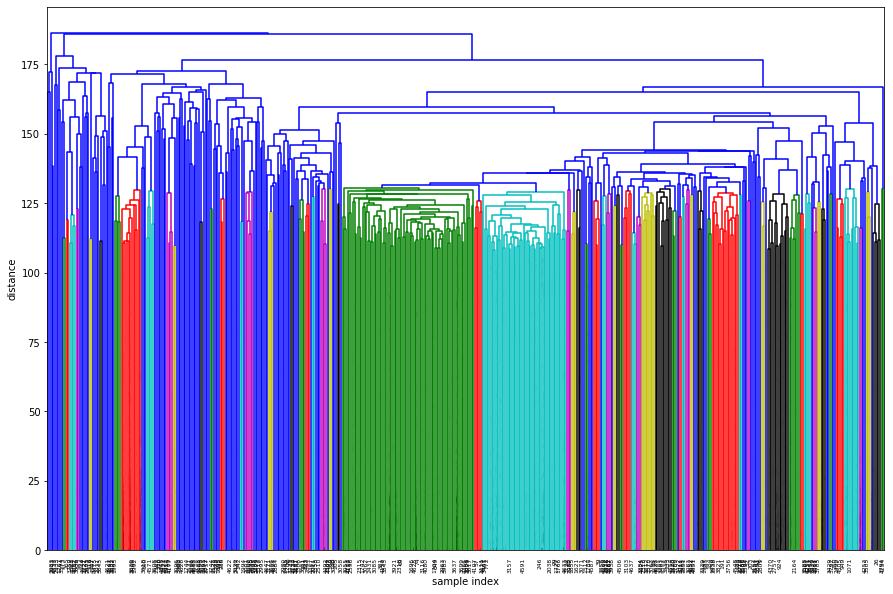

In [105]:
#dendrogram(linkage_matrix)

plt.figure(figsize=(15,10)) 
#plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=500,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=6.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)

plt.savefig('class_clustering_Dendrogram')
plt.show()

In [115]:
clusters = fcluster(linkage_matrix,500,criterion='maxclust')
clusters

array([243, 218,  46, ..., 288, 388, 385], dtype=int32)

In [116]:
len(clusters)

4653

In [117]:
#get the indexes
biglist=[]

for i in range(450):
    smalllist=[]
    for j in range(len(clusters)):
        if clusters[j] == i+1:
            smalllist.append(j)
    if len(smalllist) != 0:
        biglist.append(smalllist)
    

In [118]:
print(protein_alphabet, n_aas)

ACDEFGHIKLMNPQRSTVWY 20


In [119]:
def decodeAA(num):
    AA = protein_alphabet[num-1]
    return AA

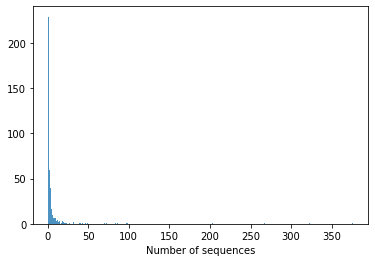

In [120]:
file_seq_number=[]
for small_list in biglist:
    file_seq_number.append(len(small_list))
    

plt.hist(file_seq_number,400, alpha=0.8)
plt.xlabel("Number of sequences")
#plt.title('Protein Length Distribution ')
#plt.vlines(x=700,colors='r',ymin=0,ymax=3000,alpha=0.5,linestyle= '--')

#plt.savefig('protein_numbers_in_file')
plt.show()

In [121]:
print(len(biglist))

450


In [122]:
num_of1 = 0
num_of10 = 0
for small_list in biglist:
    if len(small_list) ==1:
        num_of1 +=1
        num_of10 +=1
    elif len(small_list)<= 10:
        num_of10 +=1
    else:
        pass
print(num_of1,num_of10, 450 - num_of10)

229 397 53


In [32]:

for small_list in biglist:
    for i in range(len(small_list)):
        print(main_pro_class_list[small_list[i]], end =" ")
    for j in range(len(small_list)):
        print(len(main_proteins[small_list[i]]), end =" ")
    print('')
    print('------------------------------------------------')
    

mexX mexX 324 324 
------------------------------------------------
blaL blaL blaL 363 363 363 
------------------------------------------------
ncrC 366 
------------------------------------------------
mrdH 363 
------------------------------------------------
cnrC 366 
------------------------------------------------
bepC 373 
------------------------------------------------
cmx cmx cmx 380 380 380 
------------------------------------------------
LHR_kefB 379 
------------------------------------------------
tet(C) tet(C) tet(C) tet(C) tet(C) tet(C) 398 398 398 398 398 398 
------------------------------------------------
tet(C) 394 
------------------------------------------------
tet(C) 397 
------------------------------------------------
tet(A) tet(A) 399 399 
------------------------------------------------
tet(A) 400 
------------------------------------------------
tet(G) tet(G) 378 378 
------------------------------------------------
tet(G) 394 
---------------------------

blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC blaADC

mchF mchF mchF mchF mchF mchF mchF mchF mchF 269 269 269 269 269 269 269 269 269 
------------------------------------------------
smdB 270 
------------------------------------------------
ant(6)-Ic ant(6)-Ia ant(6)-Ia aadE ant(6)-Ia ant(6)-Ib ant(6)-Ia 278 278 278 278 278 278 278 
------------------------------------------------
str aadK str str 278 278 278 278 
------------------------------------------------
beta-4 epsilon-7 epsilon-2 alpha-5 alpha-5 gamma-2 epsilon-2 epsilon-2 beta-4 epsilon-2 epsilon-2 gamma-1 beta-4 epsilon-2 gamma-1 epsilon-2 beta-4 beta-4 epsilon-7 beta-4 epsilon-7 epsilon-2 epsilon-7 rho-3 epsilon-7 beta-4 epsilon-7 beta-4 beta-4 epsilon-7 epsilon-3 epsilon-7 epsilon-7 gamma-1 epsilon-7 epsilon-2 epsilon-7 epsilon-7 epsilon-2 epsilon-7 epsilon-7 epsilon-1 fdeC epsilon-7 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 
---------------

blaTEM blaTEM blaLRA-5 blaR39 blaRTG blaRTG blaRTG blaRTG blaGIL blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaRTG blaROB blaTEM blaTEM blaTEM blaROB blaTEM blaTEM blaTEM blaTEM blaTEM blaROB blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaTEM blaRTG blaTEM blaTEM blaT

blaB blaB blaB blaB blaB blaB blaB blaB blaEBR blaIND blaIND blaIND blaIND blaIND blaMUS blaPEDO-3_fam blaSIM blaHMB blaB blaB blaB blaB blaB blaB blaB blaB blaB blaB blaB blaB blaB blaB blaB blaB blaB blaB blaMUS blaSHN blaJOHN BcII blaZOG blaSIM blaB blaB blaALI blaIND blaB blaB blaB blaIND blaB blaB blaB 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 
------------------------------------------------
BcII BcII blaDIM blaGIM blaIND blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaMYO blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaSPN79 blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaVIM blaV

sul1 sul1 sul1 sul1 sul1 sul1 sul1 sul1 sul1 sul2 sul2 sul2 sul3 sul1 sul1 sul1 sul1 sul2 sul2 sul2 sul1 sul2 sul2 sul2 sul2 sul2 sul1 sul2 sul1 sul2 sul1 sul1 sul1 sul1 sul1 sul1 sul1 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 
------------------------------------------------
folP 244 
------------------------------------------------
aph(3'')-Ib aph(3'')-Ib aph(3'')-Ib aph(3'')-Ib 251 251 251 251 
------------------------------------------------
aph(3')-IIb aph(3')-IIb 239 239 
------------------------------------------------
vmlR 238 
------------------------------------------------
aph(3')-XV aph(3')-XV aph(3')-XV 229 229 229 
------------------------------------------------
papG-II 229 
------------------------------------------------
aph(2'')-IIIa 229 
------------------------------------------------
aph(3')-Id 235 
------------------------------------------------
pbp4 235 
---

blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-213_like blaOXA-213_like blaOXA-213_like blaOXA-213_like blaOXA-213_like blaOXA-213_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-213_like blaOXA-213_like blaOXA-51_like blaOXA-51_like blaOXA-213_like blaOXA-213_like blaOXA-213_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-213_like blaOXA-51_like blaOXA-213_like blaOXA-214_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-51_like blaOXA-213_like blaOXA-213_like blaOXA-213_like blaOXA-51_like blaOXA blaOXA blaOXA-51_like blaOXA-51_like blaOXA-213_like blaOXA-213_like blaOXA-51_like blaOXA-51_like blaOXA-213_like blaOXA-213_like 296 296 296 296 296 296 296 296 296 296 296 296 296 296 296 296 296 296 296 296 

In [33]:
def most_frequent(List): 
    dict = {} 
    count, itm = 0, '' 
    for item in reversed(List): 
        dict[item] = dict.get(item, 0) + 1
        if dict[item] >= count : 
            count, itm = dict[item], item 
    return(itm) 

In [34]:
print(main_pro_class_list[most_frequent(biglist[5])])

bepC


In [35]:
file_name_list=[]

for small_list in biglist:
    name = str(main_pro_class_list[most_frequent(small_list)])
    while name in file_name_list:
        name = name + "'"
    file_name_list.append(name)
        
                           
    
len(file_name_list)

450

In [36]:
length_list=[]

for small_list in biglist:
    min_length = len(main_proteins[small_list[0]])
    for i in range(len(small_list)):
        if len(main_proteins[small_list[i]]) < min_length:
            min_length  = len(main_proteins[small_list[i]])
    length_list.append(min_length)
length_list

[322,
 363,
 366,
 363,
 366,
 373,
 380,
 379,
 398,
 394,
 397,
 399,
 400,
 378,
 394,
 392,
 398,
 391,
 357,
 360,
 389,
 394,
 390,
 398,
 383,
 390,
 400,
 397,
 397,
 396,
 392,
 396,
 387,
 391,
 360,
 364,
 360,
 361,
 355,
 361,
 359,
 358,
 356,
 353,
 353,
 358,
 360,
 359,
 361,
 354,
 353,
 357,
 353,
 358,
 355,
 355,
 354,
 352,
 355,
 343,
 351,
 356,
 348,
 353,
 347,
 351,
 352,
 349,
 350,
 351,
 355,
 352,
 345,
 352,
 361,
 355,
 371,
 371,
 372,
 372,
 372,
 366,
 360,
 377,
 375,
 375,
 378,
 372,
 367,
 367,
 370,
 376,
 308,
 313,
 326,
 331,
 334,
 326,
 317,
 316,
 323,
 319,
 328,
 333,
 337,
 332,
 348,
 320,
 345,
 338,
 324,
 320,
 328,
 332,
 334,
 327,
 329,
 323,
 335,
 335,
 326,
 332,
 330,
 293,
 304,
 303,
 304,
 297,
 302,
 293,
 315,
 310,
 309,
 324,
 324,
 315,
 329,
 283,
 280,
 269,
 267,
 279,
 276,
 278,
 279,
 280,
 270,
 281,
 280,
 257,
 276,
 275,
 269,
 270,
 276,
 278,
 275,
 285,
 276,
 272,
 265,
 266,
 269,
 283,
 283,
 261,
 261

In [37]:
#FOR every small list, create a file
n=0
for small_list in biglist:
    #filename = main_pro_class_list[small_list[0]]
    #print(filename)
    #filename = ''.join(e for e in filename if e.isalnum()) + '.tsv'
    
    filename = ''.join(e for e in file_name_list[n] if e.isalnum() or e=="'" or e=="_")
    filename = filename + '.tsv'                                       
    n += 1
    with open(filename, 'w') as f:
        for i in range(len(small_list)):
            f.write('>')
            f.write(main_pro_class_list[small_list[i]] + '_'+ str(i))
            f.write('|\n')
        #print(main_proteins[small_list[i]])
            f.write(str(main_proteins[small_list[i]])[:length_list[n-1]])
            f.write('\n')
        f.close()
        

In [38]:

from Bio import AlignIO

In [39]:
m =0
for i in range(len(biglist)):
    filename = ''.join(e for e in file_name_list[m] if e.isalnum() or e=="'" or e=="_") 
    m+= 1
    records = SeqIO.parse(filename + '.tsv', "fasta")
    count = SeqIO.write(records, filename + '.stockholm', "stockholm")
    print("Converted %i records" % count)
print(m)

Converted 2 records
Converted 3 records
Converted 1 records
Converted 1 records
Converted 1 records
Converted 1 records
Converted 3 records
Converted 1 records
Converted 6 records
Converted 1 records
Converted 1 records
Converted 2 records
Converted 1 records
Converted 2 records
Converted 1 records
Converted 1 records
Converted 1 records
Converted 1 records
Converted 7 records
Converted 1 records
Converted 1 records
Converted 1 records
Converted 1 records
Converted 1 records
Converted 1 records
Converted 1 records
Converted 4 records
Converted 1 records
Converted 1 records
Converted 1 records
Converted 5 records
Converted 3 records
Converted 3 records
Converted 10 records
Converted 1 records
Converted 1 records
Converted 1 records
Converted 1 records
Converted 6 records
Converted 1 records
Converted 2 records
Converted 3 records
Converted 2 records
Converted 435 records
Converted 267 records
Converted 1 records
Converted 28 records
Converted 1 records
Converted 1 records
Converted 3 re

Converted 6 records
Converted 13 records
Converted 278 records
Converted 11 records
Converted 5 records
Converted 1 records
Converted 1 records
Converted 2 records
Converted 3 records
Converted 1 records
Converted 33 records
Converted 5 records
Converted 7 records
Converted 8 records
Converted 1 records
Converted 1 records
450
